In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve

In [3]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [4]:
param_range = range(1, 30)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    x_train,
    y_train,
    param_name="n_neighbors", 
    param_range=param_range,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

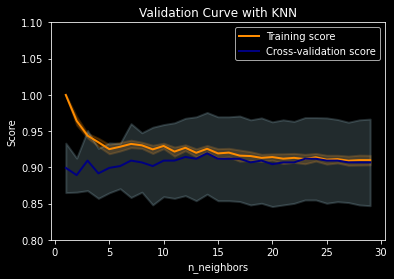

In [6]:
plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
lw = 2
plt.plot(
    param_range,
    train_scores_mean,
    label="Training score",
    color="darkorange",
    lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange", 
    lw=lw
)
plt.plot(
    param_range,
    test_scores_mean,
    label="Cross-validation score",
    color="navy",
    lw=lw)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="lightblue",
    lw=lw
)
plt.legend(loc="best")
plt.show()